# Titanic Survival Prediction

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset - Titanic

In [2]:
data=pd.read_csv('C:/Users/ADMIN/Downloads/Titanic.csv') # Loading dataset 
data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data pre-processing

In [3]:
# Including only the columns mentioned in the question
data=data.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Embarked"], axis=1)
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
dtype: int64

In [4]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data=data.dropna()
data

,Survived,Pclass,Sex,Age,Fare,Cabin
1,1,1,female,38.0,71.2833,C85
3,1,1,female,35.0,53.1000,C123
6,0,1,male,54.0,51.8625,E46
10,1,3,female,4.0,16.7000,G6
11,1,1,female,58.0,26.5500,C103
...,...,...,...,...,...,...
871,1,1,female,47.0,52.5542,D35
872,0,1,male,33.0,5.0000,B51 B53 B55
879,1,1,female,56.0,83.1583,C50
887,1,1,female,19.0,30.0000,B42


In [5]:
data.duplicated().sum()

1

In [6]:
data=data.drop_duplicates()
data

,Survived,Pclass,Sex,Age,Fare,Cabin
1,1,1,female,38.0,71.2833,C85
3,1,1,female,35.0,53.1000,C123
6,0,1,male,54.0,51.8625,E46
10,1,3,female,4.0,16.7000,G6
11,1,1,female,58.0,26.5500,C103
...,...,...,...,...,...,...
871,1,1,female,47.0,52.5542,D35
872,0,1,male,33.0,5.0000,B51 B53 B55
879,1,1,female,56.0,83.1583,C50
887,1,1,female,19.0,30.0000,B42


In [7]:
change_type = {'Age': int} 
data = data.astype(change_type)  
data.dtypes
data

,Survived,Pclass,Sex,Age,Fare,Cabin
1,1,1,female,38,71.2833,C85
3,1,1,female,35,53.1000,C123
6,0,1,male,54,51.8625,E46
10,1,3,female,4,16.7000,G6
11,1,1,female,58,26.5500,C103
...,...,...,...,...,...,...
871,1,1,female,47,52.5542,D35
872,0,1,male,33,5.0000,B51 B53 B55
879,1,1,female,56,83.1583,C50
887,1,1,female,19,30.0000,B42


In [8]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Cabin']= label_encoder.fit_transform(data['Cabin']) 
data['Sex']= label_encoder.fit_transform(data['Sex']) 
data

,Survived,Pclass,Sex,Age,Fare,Cabin
1,1,1,0,38,71.2833,81
3,1,1,0,35,53.1000,55
6,0,1,1,54,51.8625,129
10,1,3,0,4,16.7000,145
11,1,1,0,58,26.5500,49
...,...,...,...,...,...,...
871,1,1,0,47,52.5542,102
872,0,1,1,33,5.0000,34
879,1,1,0,56,83.1583,70
887,1,1,0,19,30.0000,30


# Splitting data into training set and test set

In [9]:
from sklearn.model_selection import train_test_split
x=data.drop("Survived", axis=1)
y=data["Survived"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [10]:
X_train = x_train.values
Y_train = y_train.values
X_test = x_test.values
Y_test = y_test.values

In [11]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [12]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (5, 162)
Shape of Y_train :  (1, 162)
Shape of X_test :  (5, 41)
Shape of Y_test :  (1, 41)


# Logistic Regression Model

In [13]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [14]:
def model(X, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    cost_list = []
    
    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)    
        
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
    
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W -= learning_rate*dW.T
        B -= learning_rate*dB
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after ", i, "iteration is:", cost)
    return W, B, cost_list

In [15]:
iterations = 130000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

Cost after  0 iteration is: 0.6931471805599453
Cost after  23000 iteration is: 1.628650274068161
Cost after  46000 iteration is: 0.8237628394608014
Cost after  69000 iteration is: 0.9042338564850476
Cost after  92000 iteration is: 0.8624004491347327
Cost after  115000 iteration is: 0.8381821254465214
Cost after  138000 iteration is: 0.8216103691141775
Cost after  161000 iteration is: 0.8087925304652547
Cost after  184000 iteration is: 0.7981670543829947
Cost after  207000 iteration is: 0.7890567623814037


## Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

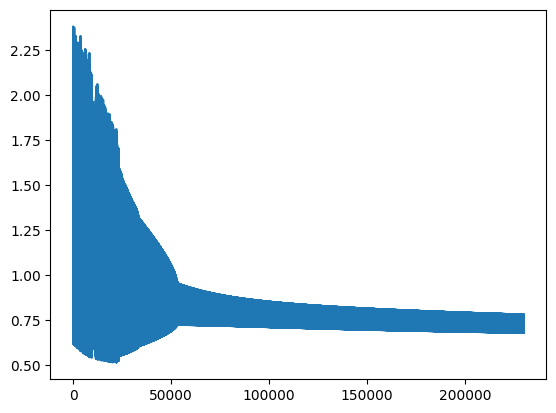

In [16]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

# Testing Model Accuracy

In [17]:
Z = np.dot(W.T, X_test) + B
A = sigmoid(Z)
A = A > 0.5
A = np.array(A, dtype = 'int64')
acc = (1 - np.sum(np.absolute(A - Y_test))/Y_test.shape[1])*100
print("Accuracy of the model is : ", round(acc, 2), "%")

Accuracy of the model is :  68.29 %
